In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

In [7]:
df = pd.read_csv("../data/cleaned/bonus-hackathon-data/discussion_data.csv")

In [8]:
df.head()

,discussion_id,title,message,posted_at,user_name,reply_id,created_at
0,1,The Purpose of Art,I believe Banksy's art is a powerful way to ad...,2024-10-17T12:00:00Z,Ana Maria Lopez,NaN,NaN
1,1,NaN,"While I see your point, I think Banksy’s work ...",NaN,Maximilian Schmidt,101.0,2024-10-17T13:00:00Z
2,1,NaN,But isn’t it performative action that gets peo...,NaN,Ana Maria Lopez,102.0,2024-10-17T14:00:00Z
3,1,NaN,I’m concerned about the risks of public engage...,NaN,Maximilian Schmidt,103.0,2024-10-17T15:00:00Z
4,1,NaN,"That’s a valid concern, but history shows that...",NaN,Ana Maria Lopez,104.0,2024-10-17T16:00:00Z


In [9]:
# 1. Basic Descriptive Statistics
# Length Analysis
df['message_length'] = df['message'].apply(len)  # length in characters
df['word_count'] = df['message'].apply(lambda x: len(x.split()))  # length in words

# Word Count
connecting_words = ["and", "a", "the", "i", "we", "s", "to", "our", "but", 
                    "it", "of", "that", "in", "if", "is", "also", "for", "with", 
                    "their", "be", "are"]
all_words = ' '.join(df['message']).lower().split()
all_words = [word for word in all_words if word not in connecting_words]
word_freq = pd.Series(all_words).value_counts()

# Unique words
unique_words = len(set(all_words))

# Message Count
total_messages = len(df)
message_counts_over_time = df['created_at'].value_counts().sort_index()

# Print results
print(f"Total Messages: {total_messages}")
print(f"Unique Words: {unique_words}")
print("Most Common Words:")
print(word_freq.head(10))

Total Messages: 45
Unique Words: 543
Most Common Words:
can          31
art          26
community    13
how          12
think        11
about        10
women        10
that’s       10
not          10
what          9
Name: count, dtype: int64


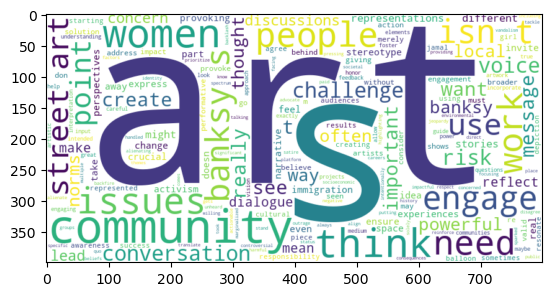

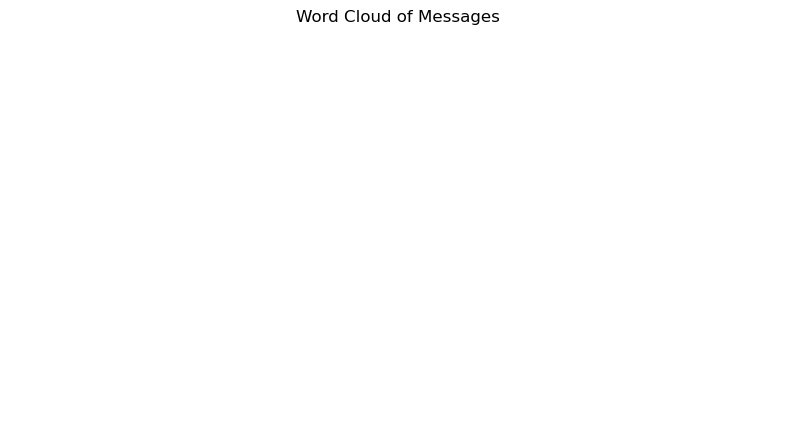

In [10]:
# 2. Visualization
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(figsize=(10, 5))
plt.axis('off')
plt.title('Word Cloud of Messages')
plt.show()

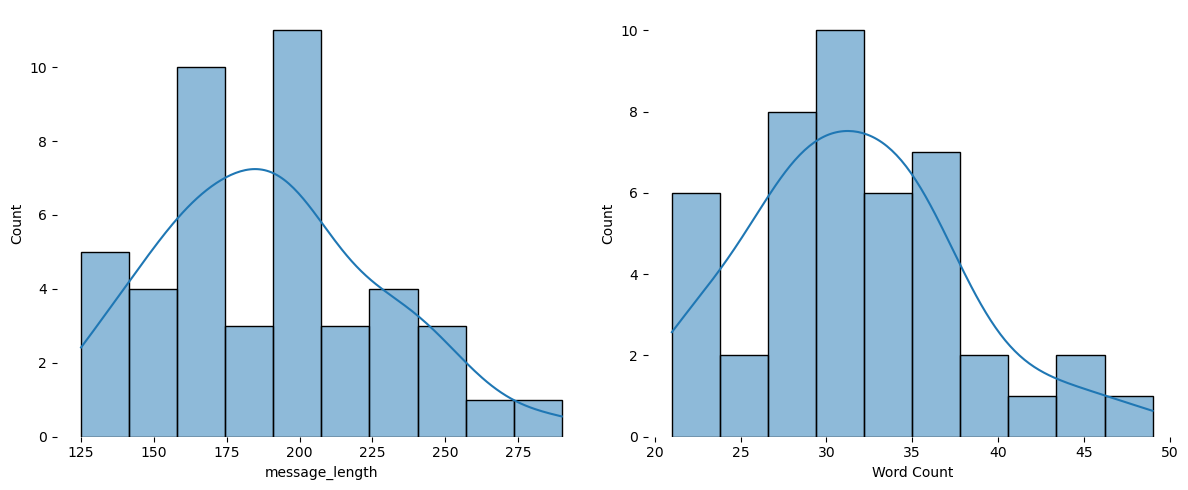

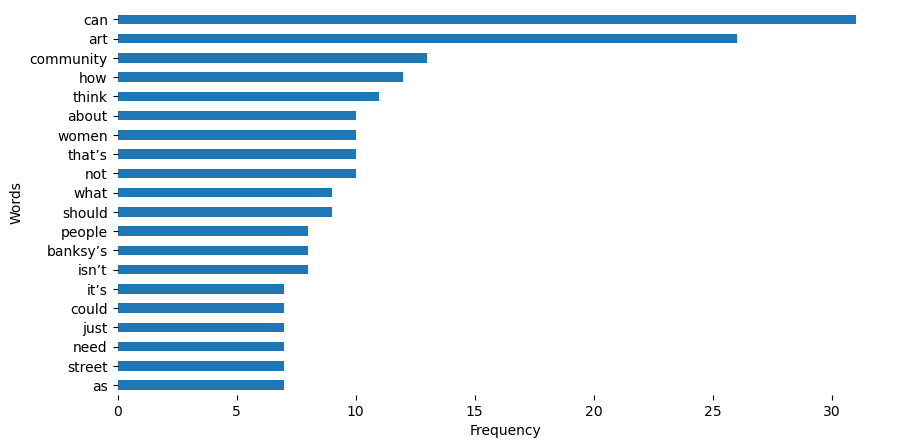

In [13]:
# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['message_length'], bins=10, kde=True)
#plt.title('Distribution of Message Lengths')
#plt.xlabel('Length (characters)')
# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.subplot(1, 2, 2)
sns.histplot(df['word_count'], bins=10, kde=True)
#plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')

# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.tight_layout()
plt.show()

# Bar Chart of Top N Words
top_n = 20
plt.figure(figsize=(10, 5))
word_freq.head(top_n).plot(kind='barh')  # Change to horizontal bar chart
#plt.title('Top N Words')
plt.xlabel('Frequency')  # Swap labels
plt.ylabel('Words')      # Swap labels
plt.gca().invert_yaxis()  # Optional: Invert y-axis for better readability
# Remove spines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [12]:
message_counts_over_time

created_at
2024-10-17T13:00:00Z    2
2024-10-17T14:00:00Z    2
2024-10-17T15:00:00Z    2
2024-10-17T16:00:00Z    2
2024-10-17T17:00:00Z    2
2024-10-17T18:00:00Z    2
2024-10-17T19:00:00Z    2
2024-10-17T20:00:00Z    2
2024-10-17T21:00:00Z    2
2024-10-17T22:00:00Z    2
2024-10-17T23:00:00Z    2
2024-10-18T00:00:00Z    2
2024-10-18T01:00:00Z    2
2024-10-18T02:00:00Z    1
2024-10-18T13:00:00Z    1
2024-10-18T14:00:00Z    1
2024-10-18T15:00:00Z    1
2024-10-18T16:00:00Z    1
2024-10-18T17:00:00Z    1
2024-10-18T18:00:00Z    1
2024-10-18T19:00:00Z    1
2024-10-18T20:00:00Z    1
2024-10-18T21:00:00Z    1
2024-10-18T22:00:00Z    1
2024-10-18T23:00:00Z    1
2024-10-19T00:00:00Z    1
2024-10-19T01:00:00Z    1
2024-10-19T02:00:00Z    1
2024-10-19T03:00:00Z    1
Name: count, dtype: int64